# Исследование поведения клиентов сотового оператора
### Введение: 
Сотовый оператор «Мегалайн» (федеральный оператор сотовой связи) предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.
### Цель:
Проанализировать поведение клиентов и оценить какой из двух тарифов приносит больше денег, чтобы скорректировать рекламный бюджет.

## Изучение данных из файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
from datetime import datetime
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats as st

In [2]:
# чтение файла с данными
path = 'input/prj_04_input/'
df_usr = pd.read_csv(path + 'users.csv')
df_tarif = pd.read_csv(path + 'tariffs.csv')
df_msg = pd.read_csv(path + 'messages.csv')
df_int = pd.read_csv(path + 'internet.csv', index_col=0)
df_calls = pd.read_csv(path + 'calls.csv')

#### Таблица users (информация о пользователях):

In [3]:
df_usr.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


###### Описание данных users
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

In [4]:
# получение общей информации о данных в таблице
df_usr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Таблица calls (информация о звонках):

In [5]:
df_calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


###### Описание данных calls
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [6]:
# получение общей информации о данных в таблице
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


#### Таблица messages (информация о сообщениях):

In [7]:
df_msg.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


###### Описание данных messages
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id`— идентификатор пользователя, отправившего сообщение

In [8]:
# получение общей информации о данных в таблице
df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### Таблица internet (информация об интернет-сессиях):

In [9]:
df_int.head(3)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000


###### Описание данных internet
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [10]:
# получение общей информации о данных в таблице
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


#### Таблица tariffs (информация о тарифах):

In [11]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


###### Описание данных tariffs
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [12]:
# получение общей информации о данных в таблице
df_tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Примечание:
Сотовый оператор округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


### Вывод

##### Таблица users: 
В таблице представлено данные 500 пользователей двух тарифов. В колонке churn_date отмечено 38 пользователей, которые прекратили пользоваться тарифом. 

* Необходимо посчитать сколько пользователей каждого тарифа.
* Необходимо проверить данные на дубликаты (явные и не явные - возможно, после отключения одного тарифа, пользователь подключился на другой тариф.
* Необходимо проверить как долго пользователь пользовался тарифом. Если клиент пользовался тарифом меньше месяца, то данные этого клиента нужно исключить из анализа, т.к они не дадут точной оценки сколько минут разговора, трафика интернета клиент в среденем используте в месяц.
* Проверим колонку age на аномалии.
* Проверим данные в колонке city и посмотрим кол-во пользователей по городам


###### Таблица calls
В таблице представлено 202607 записей. Пропусков данных нет.

* Необходимо проверить данные на дубликаты.
* В колонке duration есть нулевые значения - это пропущенные звонки. Эти данные необходимо удалить для правильного подсчета кол-ва звонков.
* Необходимо посчитать кол-во звонков в месяц для каждого пользователя.
* Необходимо посчитать продолжительность звонков в месяц для каждого пользователя. Сумму продолжительности звонков в месяц необходимо округлить до целого числа в большую сторону.

###### Таблица messages 
В таблице представлено 123036 записей. Пропусков данных нет.

* Необходимо проверить данные на дубликаты.

###### Таблица internet 
В таблице представлено 149396 записей. Пропусков данных нет.

* Необходимо проверить данные на дубликаты.
* Необходимо посчитать трафик интернета в месяц для каждого пользователя. Сумму трафика в месяц (в MB) необходимо округлить до целого числа в большую сторону и посчитать трафик в GB (число округлить в большую сторону до целого числа)

###### Таблица itariffs 
В таблице представлено 2 записи. Пропусков данных нет.

## Предобработка данных

##### Таблица users

In [13]:
df_usr.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


Удалим дубликаты если есть

In [14]:
# Проверка наличия дубликатов
df_usr.duplicated().value_counts()

False    500
dtype: int64

Дубликатов нет. Проверим есть ли дубликаты в клиентах (совпадение имени и фамилии)

In [15]:
# Добавим колонку с полным именем
df_usr['full_name'] = (df_usr['first_name'] + ' ' + df_usr['last_name'])

In [16]:
df_usr.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,full_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,Иван Ежов
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,Евгений Абрамович


In [17]:
# Проверим дубликаты в колонке full name
print(f'Количество дубликатов {len(df_usr[df_usr.duplicated(subset=["full_name"])])}')

Количество дубликатов 0


Дубликатов нет. Для дальнейшего анализа достаточно иметь колонку user_id, поэтому удалим колонки first_name, last_name и full_name

In [18]:
df_usr.drop(['first_name', 'last_name', 'full_name'], axis=1, inplace=True)

In [19]:
df_usr.head(3)

,user_id,age,churn_date,city,reg_date,tariff
0,1000,52,NaN,Краснодар,2018-05-25,ultra
1,1001,41,NaN,Москва,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,2018-06-17,smart


Проверим возраст клиентов

In [20]:
# Описание данных в колонке age
df_usr['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Аномальных значений нет.

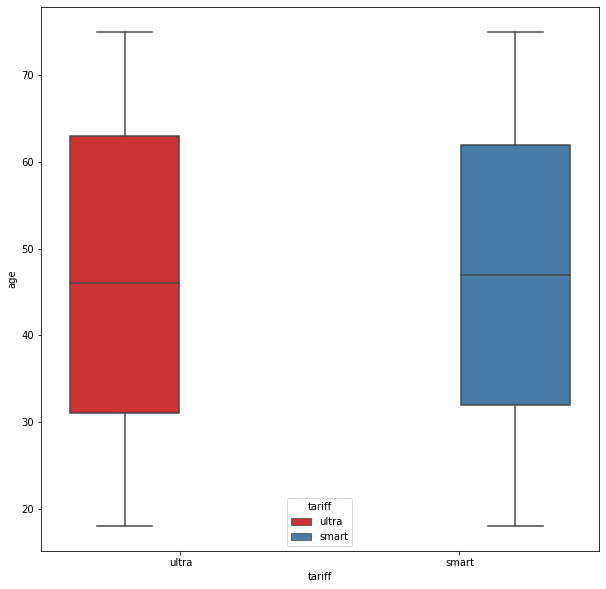

In [21]:
# Посмотрим как распределен возраст клиента в зависиомости от тарифа
plt.figure(figsize=(10,10))
sns.boxplot(data=df_usr, x='tariff', y = 'age', hue='tariff', palette="Set1");
plt.show();

In [22]:
# Описание возраста пользователей тарифа ultra
df_usr[df_usr['tariff']=='ultra']['age'].describe()

count    149.000000
mean      46.899329
std       16.923814
min       18.000000
25%       31.000000
50%       46.000000
75%       63.000000
max       75.000000
Name: age, dtype: float64

In [23]:
# Описание возраста пользователей тарифа smart
df_usr[df_usr['tariff']=='smart']['age'].describe()

count    351.000000
mean      46.455840
std       16.580287
min       18.000000
25%       32.000000
50%       47.000000
75%       62.000000
max       75.000000
Name: age, dtype: float64

Видно, что клиенты двух тарифов не отличаются по возрасту.

In [24]:
# Посмотрим количество пользователей по каждому тарифу
df_usr_c = df_usr.pivot_table(index='tariff', values='age', aggfunc='count')
df_usr_c = df_usr_c.reset_index()
df_usr_c

,tariff,age
0,smart,351
1,ultra,149


Получается, что в предоставленных данных, пользователей тарифа smart больше чем в 2 раза, чем пользователей тарифа ultra

Посмотрим данные в колонке city

In [25]:
# Количество населенных пунктов в таблице
len(df_usr['city'].unique())

76

In [26]:
# Уникальные названия населенных пунктов
df_usr['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [27]:
# Список городов с большим количеством пользователей
df_city_usr = df_usr.pivot_table(index='city', columns='tariff', values='age', aggfunc='count')
df_city_usr = df_city_usr.reset_index()
df_city_usr.sort_values(by=['smart'],ascending=False).head(10)

tariff,city,smart,ultra
31,Москва,67.0,32.0
50,Санкт-Петербург,30.0,9.0
18,Казань,13.0,1.0
39,Новосибирск,11.0,5.0
40,Омск,10.0,4.0
66,Ульяновск,10.0,1.0
14,Екатеринбург,9.0,2.0
65,Улан-Удэ,7.0,NaN
49,Самара,7.0,2.0
33,Набережные Челны,7.0,4.0


В колонке city нет неявных дубликатов. Никаких корректировок не требуется.
Наибольшее количество пользователей тарифов зарегистрированно в Москве и Санкт-Петербурге

Проверим как долго клиенты пользовались тарифами. Добавим колонки с месяцем и днем регистрации, а также с месяцем и днем отключения тарифа. Посчитаем кол-во месяцев пользования тарифами до конца 2018 года.

In [28]:
# добавим колонку для обозначения если пользователь прекратил использование тарифа
df_usr['churn_date'] = df_usr['churn_date'].fillna(0)
df_usr['subscrib_canceled'] = df_usr['churn_date'].apply(lambda x: 'False' if x == 0 else 'True')

In [29]:
df_usr.head(3)

,user_id,age,churn_date,city,reg_date,tariff,subscrib_canceled
0,1000,52,0,Краснодар,2018-05-25,ultra,False
1,1001,41,0,Москва,2018-11-01,smart,False
2,1002,59,0,Стерлитамак,2018-06-17,smart,False


In [30]:
# Посмотрим кол-во пользователей двух тарифов, которые прекратили использование пакетов
df_usr.query('churn_date !=0').pivot_table(index='tariff', values='age', aggfunc='count')

,age
tariff,
smart,23
ultra,15


In [31]:
# добавим колонку с месяцем подключения
df_usr['month'] = df_usr.apply(lambda row: int(datetime.strptime(row['reg_date'], '%Y-%m-%d').strftime("%m")), axis=1)

In [32]:
# добавим колонку с днем подключения
df_usr['day'] = df_usr.apply(lambda row: int(datetime.strptime(row['reg_date'], '%Y-%m-%d').strftime("%d")), axis=1)

In [33]:
df_usr.head(3)

,user_id,age,churn_date,city,reg_date,tariff,subscrib_canceled,month,day
0,1000,52,0,Краснодар,2018-05-25,ultra,False,5,25
1,1001,41,0,Москва,2018-11-01,smart,False,11,1
2,1002,59,0,Стерлитамак,2018-06-17,smart,False,6,17


In [34]:
# добавим колонку с последним месяцем пользования тарифом (месяц отключения или последний месяц года)
df_usr['month_c'] = df_usr['churn_date'].apply(lambda row: int(datetime.strptime(row, '%Y-%m-%d').strftime("%m")) 
                                 if row !=0 else 12)

In [35]:
# добавим колонку с последним днем использования тарифом
df_usr['day_c'] = df_usr['churn_date'].apply(lambda row: int(datetime.strptime(row, '%Y-%m-%d').strftime("%d")) 
                                 if row !=0 else 31)

In [36]:
df_usr.head(3)

,user_id,age,churn_date,city,reg_date,tariff,subscrib_canceled,month,day,month_c,day_c
0,1000,52,0,Краснодар,2018-05-25,ultra,False,5,25,12,31
1,1001,41,0,Москва,2018-11-01,smart,False,11,1,12,31
2,1002,59,0,Стерлитамак,2018-06-17,smart,False,6,17,12,31


In [37]:
# Кол-во месяцев использования тарифа
df_usr['month_use'] = df_usr['month_c'] -df_usr['month'] 

In [38]:
df_usr.head(3)

,user_id,age,churn_date,city,reg_date,tariff,subscrib_canceled,month,day,month_c,day_c,month_use
0,1000,52,0,Краснодар,2018-05-25,ultra,False,5,25,12,31,7
1,1001,41,0,Москва,2018-11-01,smart,False,11,1,12,31,1
2,1002,59,0,Стерлитамак,2018-06-17,smart,False,6,17,12,31,6


In [39]:
# Уникальные значения колонки month_use
df_usr['month_use'].unique()

array([ 7,  1,  6,  4, 11, 10,  8,  0,  9,  5,  2,  3], dtype=int64)

In [40]:
# Посмотрим распределение клиентов по количеству месяцев использования
df_usr_count_m = df_usr.pivot_table(index=['month_use','tariff'], values='user_id', aggfunc='count')
df_usr_count_m =df_usr_count_m.reset_index()
df_usr_count_m

,month_use,tariff,user_id
0,0,smart,28
1,0,ultra,8
2,1,smart,28
3,1,ultra,15
4,2,smart,35
5,2,ultra,12
6,3,smart,27
7,3,ultra,8
8,4,smart,36
9,4,ultra,18


In [41]:
#Количество пользователей, которые пользовались тарифом меньше месяца
prc_smart_0 = len(df_usr_count_m[df_usr_count_m['tariff']=='smart'])/len(df_usr[df_usr['tariff']=='smart'])
prc_ultra_0 = len(df_usr_count_m[df_usr_count_m['tariff']=='ultra'])/len(df_usr[df_usr['tariff']=='ultra'])                       
print(f'Количесво пользовалетей тарифа smart, которые пользовались тарифом меньше месяца {prc_smart_0:.2%}')
print(f'Количесво пользовалетей тарифа ultra, которые пользовались тарифом меньше месяца {prc_ultra_0:.2%}')

Количесво пользовалетей тарифа smart, которые пользовались тарифом меньше месяца 3.42%
Количесво пользовалетей тарифа ultra, которые пользовались тарифом меньше месяца 8.05%


In [42]:
# Список клиентов, которые пользовались тарифом меньше месяца
df_usr_exclud_list = list(df_usr[(df_usr['month_use']==0)]['user_id'].unique())
df_usr_exclud_list

[1008,
 1022,
 1069,
 1074,
 1084,
 1095,
 1103,
 1117,
 1128,
 1129,
 1131,
 1137,
 1140,
 1141,
 1170,
 1190,
 1192,
 1194,
 1223,
 1234,
 1236,
 1252,
 1258,
 1278,
 1297,
 1336,
 1349,
 1368,
 1371,
 1387,
 1397,
 1398,
 1406,
 1434,
 1445,
 1485]

##### Таблица users. Выводы:
Из 500 данных, 351 клиент пользуется тарифом smart и 149 - тарифом ultra.
36 клиентов (28 пользователи тарифа smart и 8 - ultra) пользовались услугами меньше месяца. Эти пользователи будут в дальнейшем исключены из анализа на определение наиболее выгодного тарифа для сотового оператора.

В данных присутствуют записи 38 клиентов, которые прекратили использование тарифа. В данном анализе мы не будем исключать из анализа этих клиентов, если на момент отключения тарифа они им пользовались больше месяца.

Создадим талбицу пользователь - тариф 

In [43]:
usr_tariff = df_usr.loc[:,['user_id', 'tariff']]
usr_tariff.head(3)

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart


##### Таблица calls

In [44]:
df_calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [45]:
# Проверка наличия дубликатов
print(f'Количество дубликатов: {len(df_calls)-df_calls.duplicated().value_counts()[0]}')

Количество дубликатов: 0


In [46]:
# Удалим строки с пропущенными звонками
df_calls = df_calls.drop(df_calls[df_calls.duration == 0].index)
df_calls = df_calls.reset_index()

In [47]:
df_calls.head(3)

,index,id,call_date,duration,user_id
0,2,1000_2,2018-06-11,2.85,1000
1,3,1000_3,2018-09-21,13.80,1000
2,4,1000_4,2018-12-15,5.18,1000


Удалим пользователей, которые пользовались тарифом меньше месяца

In [48]:
for row in df_usr_exclud_list:
    try:
        df_calls = df_calls.drop(df_calls[df_calls.user_id == row].index)
    except:
        pass

In [49]:
df_calls = df_calls.reset_index()

In [50]:
# Посмотрим описание таблицы после удаления строк
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161120 entries, 0 to 161119
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   level_0    161120 non-null  int64  
 1   index      161120 non-null  int64  
 2   id         161120 non-null  object 
 3   call_date  161120 non-null  object 
 4   duration   161120 non-null  float64
 5   user_id    161120 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 7.4+ MB


In [51]:
# Округлим данные в колонке duration до целого значения в большую сторону
df_calls['duration'] = np.ceil(df_calls['duration'])

In [52]:
df_calls.head(3)

,level_0,index,id,call_date,duration,user_id
0,0,2,1000_2,2018-06-11,3.0,1000
1,1,3,1000_3,2018-09-21,14.0,1000
2,2,4,1000_4,2018-12-15,6.0,1000


In [53]:
# добавим колонку с месяцем звонка
df_calls['month'] = df_calls.apply(lambda row: int(datetime.strptime(row['call_date'], '%Y-%m-%d').strftime("%m")), axis=1)

In [54]:
df_calls.head(3)

,level_0,index,id,call_date,duration,user_id,month
0,0,2,1000_2,2018-06-11,3.0,1000,6
1,1,3,1000_3,2018-09-21,14.0,1000,9
2,2,4,1000_4,2018-12-15,6.0,1000,12


In [55]:
#Kоличество израсходованных минут разговора по месяцам
call_dur = df_calls.pivot_table(index='user_id', columns = 'month', values='duration', aggfunc='sum')
call_dur.head(5)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


In [56]:
# Обновим индекс в таблице и заполним пропуски нулями
call_dur = call_dur.reset_index()
call_dur = call_dur.fillna(0)
call_dur.head(5)

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0.0,0.0,0.0,0.0,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,414.0
2,1002,0.0,0.0,0.0,0.0,0.0,117.0,214.0,289.0,206.0,212.0,243.0,236.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380.0,961.0,855.0,824.0,802.0
4,1004,0.0,0.0,0.0,0.0,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


In [57]:
# добавим колонку с тарифом
call_dur = pd.merge(call_dur, usr_tariff, on='user_id')

In [58]:
call_dur.head(5)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,414.0,smart
2,1002,0.0,0.0,0.0,0.0,0.0,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380.0,961.0,855.0,824.0,802.0,ultra
4,1004,0.0,0.0,0.0,0.0,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,ultra


In [59]:
# добавим колонку со средней продолжительностю звонков в месяц
mean_month_call_dur = []
for row in range(0, len(call_dur)):
    user_call = call_dur.loc[row, 'user_id']
    start_m = df_usr.iloc[df_usr[df_usr['user_id']==user_call].index[0]]['month']
    end_m = df_usr.iloc[df_usr[df_usr['user_id']==user_call].index[0]]['month_c']
    mean_month_call = call_dur.iloc[row, start_m:end_m+1].median()
    mean_month_call_dur.append(mean_month_call)
call_dur['mean_m_call_dur'] =mean_month_call_dur

In [60]:
call_dur.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_m_call_dur
0,1000,0.0,0.0,0.0,0.0,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra,339.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,414.0,smart,422.0
2,1002,0.0,0.0,0.0,0.0,0.0,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart,214.0


In [61]:
#Средняя продолжительность звонка в минутах в месяц в зависимости от тарифа
call_dur.pivot_table(index='tariff', values='mean_m_call_dur', aggfunc='mean')

,mean_m_call_dur
tariff,
smart,438.195652
ultra,571.018382


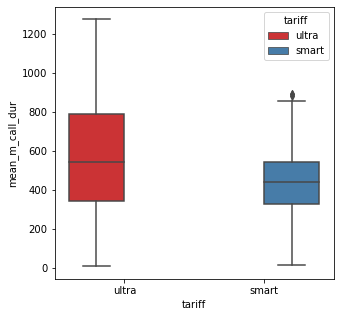

In [62]:
# Продолжительность звонков в месяц
plt.figure(figsize=(5,5))
sns.boxplot(data=call_dur, x='tariff', y = 'mean_m_call_dur', hue='tariff', palette="Set1")
plt.show();

In [63]:
print(f"Среднее количество минут разговора тарифа smart в месяц: {call_dur.pivot_table(index='tariff', values='mean_m_call_dur', aggfunc='mean').iloc[0][0]:.0f} ")
print(f"Среднее количество минут разговора тарифа ultra в месяц: {call_dur.pivot_table(index='tariff', values='mean_m_call_dur', aggfunc='mean').iloc[1][0]:.0f} ")

Среднее количество минут разговора тарифа smart в месяц: 438 
Среднее количество минут разговора тарифа ultra в месяц: 571 


Получается, что в среднем, пользователи тарифа smart не привышают порог в 500 мин включенных в тариф. Но есть пользователи этого тарифа, которые превышают этот порог.

Что касается пользователей тарифа ultra, в среденем за месяц ни один клиент не превысил порогового значения в 3000 мин

Посчитаем кол-во звонков без учета пропущенных

In [64]:
#Kоличество сделанных звонков по месяцам
call_count = df_calls.pivot_table(index='user_id', columns = 'month', values='id', aggfunc='count')
call_count = call_count.reset_index()
call_count = call_count.fillna(0)
call_count.head(5)

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0.0,0.0,0.0,0.0,17.0,28.0,41.0,42.0,46.0,44.0,37.0,38.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,47.0
2,1002,0.0,0.0,0.0,0.0,0.0,14.0,21.0,37.0,25.0,24.0,25.0,27.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,105.0,97.0,95.0,88.0
4,1004,0.0,0.0,0.0,0.0,7.0,25.0,20.0,18.0,18.0,21.0,15.0,15.0


In [65]:
# добавим колонку со средним количеством звонков в месяц
mean_month_call_count = []
for row in range(0, len(call_count)):
    user_call = call_count.loc[row, 'user_id']
    start_m = df_usr.iloc[df_usr[df_usr['user_id']==user_call].index[0]]['month']
    end_m = df_usr.iloc[df_usr[df_usr['user_id']==user_call].index[0]]['month_c']
    mean_month_call_count_i = call_count.iloc[row, start_m:end_m+1].median()
    mean_month_call_count.append(mean_month_call_count_i)
call_count['mean_m_call_coun'] = mean_month_call_count

In [66]:
call_count.head(3)

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12,mean_m_call_coun
0,1000,0.0,0.0,0.0,0.0,17.0,28.0,41.0,42.0,46.0,44.0,37.0,38.0,39.5
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,47.0,46.0
2,1002,0.0,0.0,0.0,0.0,0.0,14.0,21.0,37.0,25.0,24.0,25.0,27.0,25.0


In [67]:
# добавим колонку с тарифом
call_count = pd.merge(call_count, usr_tariff, on='user_id')

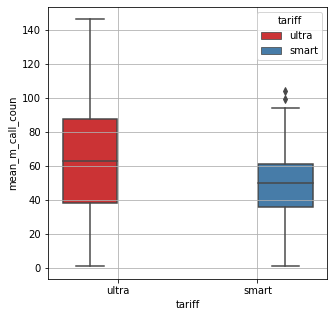

In [68]:
# Среднее кол-во звонков в месяц
plt.figure(figsize=(5,5))
sns.boxplot(data=call_count, x='tariff', y = 'mean_m_call_coun', hue='tariff', palette="Set1")
plt.grid()
plt.show();

Видно, что пользователи тарифа ultra в среднем совершают больше звонков в месяц, чем пользователи тарифа smart

##### Таблица calls. Выводы:
Из данных были удалены строки с пропущенными звонками. Было посчитано среденее кол-во звонков в месяц и суммарная продолжительность звонков в месяц для каждого клиента. 

Клиенты тарифа ultra совершают звонки чаще, чем пользователи тарифа smart и суммарная продоложительность звонков в месяц также выше, чем у клиентов тарифа smart. 

##### Таблица messages 

In [69]:
df_msg.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [70]:
# Проверка наличия дубликатов
print(f'Количество дубликатов: {len(df_msg)-df_msg.duplicated().value_counts()[0]}')

Количество дубликатов: 0


In [71]:
#Удалим пользователей, которые пользовались тарифом меньше месяца
for row in df_usr_exclud_list:
    try:
        df_msg = df_msg.drop(df_msg[df_msg.user_id == row].index)
    except:
        pass

In [72]:
# добавим колонку с месяцем отправки сообщения
df_msg['month'] = df_msg.apply(lambda row: int(datetime.strptime(row['message_date'], '%Y-%m-%d').strftime("%m")), axis=1)

In [73]:
df_msg.head(3)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8


In [74]:
#Kоличество сделанных сообщений по месяцам
msg_count = df_msg.pivot_table(index='user_id', columns = 'month', values='id', aggfunc='count')
msg_count = msg_count.reset_index()
msg_count = msg_count.fillna(0)
msg_count.head(5)

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0
2,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0
3,1004,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
4,1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


In [75]:
# добавим колонку с тарифом
msg_count = pd.merge(msg_count, usr_tariff, on='user_id')

In [76]:
msg_count.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra
1,1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0,smart
2,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0,ultra


In [77]:
# добавим колонку со средним количеством сообщений в месяц
mean_month_msg_count = []
for row in range(0, len(msg_count)):
    user_call = msg_count.loc[row, 'user_id']
    start_m = df_usr.iloc[df_usr[df_usr['user_id']==user_call].index[0]]['month']
    end_m = df_usr.iloc[df_usr[df_usr['user_id']==user_call].index[0]]['month_c']
    mean_month_msg_count_i = msg_count.iloc[row, start_m:end_m+1].median()
    mean_month_msg_count.append(mean_month_msg_count_i)
msg_count['mean_m_msg_count'] = mean_month_msg_count

In [78]:
msg_count.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_m_msg_count
0,1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra,65.0
1,1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0,smart,11.0
2,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0,ultra,83.0


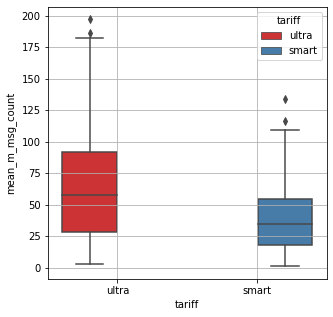

In [79]:
# Среднее кол-во сообщений в месяц
plt.figure(figsize=(5,5))
sns.boxplot(data=msg_count, x='tariff', y = 'mean_m_msg_count', hue='tariff', palette="Set1")
plt.grid()
plt.show();

##### Таблица messages. Выводы:
Из данных были удалены строки пользователей, которые пользовались тарифом меньше месяца. Было посчитано кол-во сообщений в каждый месяц и среденее кол-во сообщений в месяц.

Клиенты тарифа ultra отправляют сообщения чаще, чем пользователи тарифа smart

##### Таблица internet

In [80]:
df_int.head(5)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [81]:
#Удалим пользователей, которые пользовались тарифом меньше месяца
for row in df_usr_exclud_list:
    try:
        df_int = df_int.drop(df_int[df_int.user_id == row].index)
    except:
        pass

In [82]:
# добавим колонку с месяцем сессии
df_int['month'] = df_int.apply(lambda row: int(datetime.strptime(row['session_date'], '%Y-%m-%d').strftime("%m")), axis=1)

In [83]:
df_int.head(3)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6


In [84]:
#Объем израсходованного интернет-трафика по месяцам
int_traf = df_int.pivot_table(index='user_id', columns = 'month', values='mb_used', aggfunc='sum')
int_traf = int_traf.reset_index()
int_traf = int_traf.fillna(0)
int_traf.head(3)

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0.0,0.0,0.0,0.0,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1,1001,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,18429.34,14036.66
2,1002,0.0,0.0,0.0,0.0,0.00,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73


In [85]:
# Округлим значения до целого значения в большую сторону
for i in range(1,13):
    int_traf[i] = int_traf[i].apply(np.ceil)

In [86]:
int_traf.head(3)

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0.0,0.0,0.0,0.0,2254.0,23234.0,14004.0,14056.0,14569.0,14703.0,14757.0,9818.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18430.0,14037.0
2,1002,0.0,0.0,0.0,0.0,0.0,10857.0,17581.0,20320.0,16692.0,13889.0,18588.0,18114.0


In [87]:
# Создадим новую таблицу с трафиком в Гб
int_traf_g = int_traf.copy()

In [88]:
for j in range(1,13):
    int_traf_g[j] = int_traf_g[j]/1024

In [89]:
int_traf_g.head(3)

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0.0,0.0,0.0,0.0,2.201172,22.689453,13.675781,13.726562,14.227539,14.358398,14.411133,9.587891
1,1001,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.998047,13.708008
2,1002,0.0,0.0,0.0,0.0,0.000000,10.602539,17.168945,19.843750,16.300781,13.563477,18.152344,17.689453


In [90]:
# добавим колонку с тарифом
int_traf_g = pd.merge(int_traf_g, usr_tariff, on='user_id')

In [91]:
# Округлим значения до целого значения в большую сторону
for k in range(1,13):
    int_traf_g[k] = int_traf_g[k].apply(np.ceil)

In [92]:
int_traf_g.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,ultra
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0,smart
2,1002,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0,smart


In [93]:
# добавим колонку со средним количеством сообщений в месяц
mean_month_int_traf = []
for row in range(0, len(int_traf_g)):
    user_call = int_traf_g.loc[row, 'user_id']
    start_m = df_usr.iloc[df_usr[df_usr['user_id']==user_call].index[0]]['month']
    end_m = df_usr.iloc[df_usr[df_usr['user_id']==user_call].index[0]]['month_c']
    mean_month_int_traf_i = int_traf_g.iloc[row, start_m:end_m+1].median()
    mean_month_int_traf.append(mean_month_int_traf_i)
int_traf_g['mean_month_int_traffic'] = mean_month_int_traf

In [94]:
int_traf_g.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_month_int_traffic
0,1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,ultra,14.5
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0,smart,16.0
2,1002,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0,smart,18.0


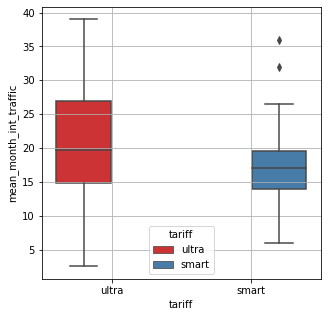

In [95]:
# Среднее кол-во трафика в Гб
plt.figure(figsize=(5,5))
sns.boxplot(data=int_traf_g, x='tariff', y = 'mean_month_int_traffic', hue='tariff', palette="Set1")
plt.grid()
plt.show();

##### Таблица internet. Выводы:
Из данных были удалены строки пользователей, которые пользовались тарифом меньше месяца. Был посчитан трафик в Гб в месяц для каждого пользователя, а также средний трафик в месяц

Клиенты тарифа ultra в среднем используют больше трафика в месяц, чем пользователи тарифа smart. В среднем, пользователь тарифа ultra не превышает пороговое значение в 30Гб, а пользователь тарифа smart в среднем в месяц превышает пороговое значение в месяц - 15Гб

## Расчёты и добавление результатов в таблицу

Посчитаем помесячную выручку с каждого клиента

In [96]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [97]:
# добавим колонку в датасет df_tarif с количеством Гб включеных в тариф
df_tarif['mb_per_month_included_Gb'] = df_tarif['mb_per_month_included']/1024

In [98]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,mb_per_month_included_Gb
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [99]:
# Создадим копию датасета для звонков
cost_call_dur = call_dur.copy()

In [100]:
cost_call_dur.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_m_call_dur
0,1000,0.0,0.0,0.0,0.0,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra,339.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,414.0,smart,422.0
2,1002,0.0,0.0,0.0,0.0,0.0,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart,214.0


In [101]:
# Функция для расчета выручки в месяц при привышении лимита
def cost_convert(df_month0, case_includ, case_cost):
    df_month = df_month0.copy()
    for row in range(0, len(df_month)):
        if df_month.loc[row, 'tariff'] == 'smart':
            for cl in range(1,13):
                if df_month.loc[row, cl] > df_tarif.at[0, case_includ]:
                    df_month.loc[row, cl] = (df_month.loc[row, cl] - df_tarif.at[0, case_includ])*df_tarif.at[0, case_cost]
                else:
                    df_month.loc[row, cl] = 0
        elif df_month.loc[row, 'tariff'] == 'ultra':
            for cl in range(1,13):
                if df_month.loc[row, cl] > df_tarif.at[1, case_includ]:
                    df_month.loc[row, cl] = (df_month.loc[row, cl] - df_tarif.at[1, case_includ])*df_tarif.at[1, case_cost]
                else:
                    df_month.loc[row, cl] = 0
    return df_month

In [102]:
# датасет стоимости использования тарифа за звонки
cost_call_dur = cost_convert(cost_call_dur, 'minutes_included', 'rub_per_minute')

In [103]:
cost_call_dur.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_m_call_dur
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,339.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart,422.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart,214.0


In [104]:
cost_call_dur.drop(['mean_m_call_dur'], axis=1, inplace=True)

In [105]:
cost_call_dur.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart


In [106]:
# Создадим копию датасета для сообщений
cost_msg_count = msg_count.copy()

In [107]:
cost_msg_count.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_m_msg_count
0,1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra,65.0
1,1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0,smart,11.0
2,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0,ultra,83.0


In [108]:
# датасет стоимости использования тарифа за сообщения
cost_msg_count = cost_convert(msg_count, 'messages_included', 'rub_per_message')

In [109]:
cost_msg_count.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_m_msg_count
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,65.0
1,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart,11.0
2,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,83.0


In [110]:
# удалим последнюю колонку
cost_msg_count.drop(['mean_m_msg_count'], axis=1, inplace=True)

In [111]:
cost_msg_count.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart
2,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra


In [112]:
# Создадим копию датасета для интернет-трафика
cost_int_traf_g = int_traf_g.copy()

In [113]:
cost_int_traf_g.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_month_int_traffic
0,1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,ultra,14.5
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0,smart,16.0
2,1002,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0,smart,18.0


In [114]:
# удалим последнюю колонку
cost_int_traf_g.drop(['mean_month_int_traffic'], axis=1, inplace=True)

In [115]:
cost_int_traf_g.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,ultra
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0,smart
2,1002,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0,smart


In [116]:
# датасет стоимости использования тарифа за интернет
cost_int_traf_g0 = cost_convert(cost_int_traf_g, 'mb_per_month_included_Gb', 'rub_per_gb')

In [117]:
cost_int_traf_g0.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,smart
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,600.0,1000.0,400.0,0.0,800.0,600.0,smart


Создадим общую таблицу, в которой будут все клиенты, по которым будем делать анализ

In [118]:
df_usr_calc = df_usr.copy()

In [119]:
#Удалим пользователей, которые пользовались тарифом меньше месяца
for row in df_usr_exclud_list:
    try:
        df_usr_calc = df_usr_calc.drop(df_usr_calc[df_usr_calc.user_id == row].index)
    except:
        pass

In [120]:
df_usr_calc = df_usr_calc.reset_index()

In [121]:
df_usr_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              464 non-null    int64 
 1   user_id            464 non-null    int64 
 2   age                464 non-null    int64 
 3   churn_date         464 non-null    object
 4   city               464 non-null    object
 5   reg_date           464 non-null    object
 6   tariff             464 non-null    object
 7   subscrib_canceled  464 non-null    object
 8   month              464 non-null    int64 
 9   day                464 non-null    int64 
 10  month_c            464 non-null    int64 
 11  day_c              464 non-null    int64 
 12  month_use          464 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 47.2+ KB


In [122]:
df_usr_calc.head(3)

,index,user_id,age,churn_date,city,reg_date,tariff,subscrib_canceled,month,day,month_c,day_c,month_use
0,0,1000,52,0,Краснодар,2018-05-25,ultra,False,5,25,12,31,7
1,1,1001,41,0,Москва,2018-11-01,smart,False,11,1,12,31,1
2,2,1002,59,0,Стерлитамак,2018-06-17,smart,False,6,17,12,31,6


In [123]:
# удалим колонки churn_date and reg_date
df_usr_calc.drop(['churn_date', 'reg_date', 'index'], axis=1, inplace=True)

In [124]:
df_usr_calc.head(3)

,user_id,age,city,tariff,subscrib_canceled,month,day,month_c,day_c,month_use
0,1000,52,Краснодар,ultra,False,5,25,12,31,7
1,1001,41,Москва,smart,False,11,1,12,31,1
2,1002,59,Стерлитамак,smart,False,6,17,12,31,6


In [125]:
# Добавим пустые колонки для 12 месяцев
for i in range(1,13):
    month_id = 'month_' + str(i)
    df_usr_calc[month_id] = 0

In [126]:
df_usr_calc.head(3)

,user_id,age,city,tariff,subscrib_canceled,month,day,month_c,day_c,month_use,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1000,52,Краснодар,ultra,False,5,25,12,31,7,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,41,Москва,smart,False,11,1,12,31,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,59,Стерлитамак,smart,False,6,17,12,31,6,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
# добавим стоимость использования тарифа в месяц для каждого клиента
df_usr_paid = df_usr_calc.copy()
for row in range(0, len(df_usr_paid)):
    usr_id = df_usr_paid.loc[row, 'user_id'] 
    usr_tariff = df_usr_paid.loc[row, 'tariff']
    month_start = df_usr_paid.loc[row, 'month']
    month_end = df_usr_paid.loc[row, 'month_c']
 
    if usr_tariff == 'smart':
        fee = df_tarif.at[0, 'rub_monthly_fee']
    else:
        fee = df_tarif.at[1, 'rub_monthly_fee']
    for month in range(month_start,month_end+1):
        month_id = 'month_' + str(month)
        df_usr_paid.loc[row, month_id] = df_usr_paid.loc[row, month_id] + fee
        # pay for calls
        try:
            df_usr_paid.loc[row, month_id] = df_usr_paid.loc[row, month_id] + cost_call_dur.loc[cost_call_dur.user_id==usr_id, month].values[0]
        except:
            pass
        # pay for messages
        try:
            df_usr_paid.loc[row, month_id] = df_usr_paid.loc[row, month_id] + cost_msg_count.loc[cost_msg_count.user_id==usr_id, month].values[0]
        except:
            pass
        # pay for internet
        try:
            df_usr_paid.loc[row, month_id] = df_usr_paid.loc[row, month_id] + cost_int_traf_g0.loc[cost_int_traf_g0.user_id==usr_id, month].values[0]
        except:
            pass

In [128]:
df_usr_paid.head(10)

,user_id,age,city,tariff,subscrib_canceled,month,day,month_c,day_c,month_use,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1000,52,Краснодар,ultra,False,5,25,12,31,7,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1,1001,41,Москва,smart,False,11,1,12,31,1,0,0,0,0,0,0,0,0,0,0,1150,550
2,1002,59,Стерлитамак,smart,False,6,17,12,31,6,0,0,0,0,0,550,1150,1550,950,550,1350,1150
3,1003,23,Москва,ultra,False,8,17,12,31,4,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
4,1004,68,Новокузнецк,ultra,False,5,14,12,31,7,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
5,1005,67,Набережные Челны,smart,False,1,25,12,31,11,550,550,886,1186,835,886,775,949,556,1219,694,838
6,1006,21,Ульяновск,smart,False,2,26,12,31,10,0,550,950,550,550,550,1550,1350,750,1550,550,1350
7,1007,65,Москва,smart,False,4,19,12,31,8,0,0,0,550,1150,685,981,1750,1015,550,990,550
8,1009,24,Пермь,smart,False,3,22,12,31,9,0,0,550,550,550,750,2550,2350,1950,1550,950,1350
9,1010,26,Тюмень,smart,False,8,5,12,31,4,0,0,0,0,0,0,0,550,750,550,1350,1350


In [129]:
# добавим колонку со средений платой в месяц для каждого клиента
mean_month_pay = []
for row in range(0, len(df_usr_paid)):
    start_m = df_usr_paid.loc[row, 'month']
    end_m = df_usr_paid.loc[row, 'month_c']
    month_s = df_usr_paid.columns.get_loc('month_' + str(start_m))
    month_e = df_usr_paid.columns.get_loc('month_' + str(end_m))+1
    mean_month_pay_i = df_usr_paid.iloc[row, month_s:month_e].mean()
    mean_month_pay.append(mean_month_pay_i)
df_usr_paid['mean_month_tariff_pay'] = mean_month_pay

In [130]:
df_usr_paid.head(5)

,user_id,age,city,tariff,subscrib_canceled,month,day,month_c,day_c,month_use,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,mean_month_tariff_pay
0,1000,52,Краснодар,ultra,False,5,25,12,31,7,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,1950.000000
1,1001,41,Москва,smart,False,11,1,12,31,1,0,0,0,0,0,0,0,0,0,0,1150,550,850.000000
2,1002,59,Стерлитамак,smart,False,6,17,12,31,6,0,0,0,0,0,550,1150,1550,950,550,1350,1150,1035.714286
3,1003,23,Москва,ultra,False,8,17,12,31,4,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,1950.000000
4,1004,68,Новокузнецк,ultra,False,5,14,12,31,7,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,1950.000000


Добавим в таблицу колонки с со средним кол-ом минут разговора в месяц, средним кол-ом сообщений и трафиков интернета в месяц для каждого клиента

In [131]:
#Таблица с кол-ом минут разговора в месяц
call_dur.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_m_call_dur
0,1000,0.0,0.0,0.0,0.0,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra,339.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,414.0,smart,422.0
2,1002,0.0,0.0,0.0,0.0,0.0,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart,214.0


In [132]:
#Таблица со средним кол-ом минут разговора в месяц
call_dur_mean = call_dur.loc[:, ['user_id', 'mean_m_call_dur']]

In [133]:
call_dur_mean.head(3)

,user_id,mean_m_call_dur
0,1000,339.0
1,1001,422.0
2,1002,214.0


In [134]:
# создадим копию даатасета df_usr_paid
df_usr_paid_c = df_usr_paid.copy()

In [135]:
# добавим колонку со средним кол-ом минут разговора в месяц
df_usr_paid_c = pd.merge(df_usr_paid_c, call_dur_mean, on='user_id')

In [136]:
df_usr_paid_c.head(3)

,user_id,age,city,tariff,subscrib_canceled,month,day,month_c,day_c,month_use,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,mean_month_tariff_pay,mean_m_call_dur
0,1000,52,Краснодар,ultra,False,5,25,12,31,7,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,1950.000000,339.0
1,1001,41,Москва,smart,False,11,1,12,31,1,0,0,0,0,0,0,0,0,0,0,1150,550,850.000000,422.0
2,1002,59,Стерлитамак,smart,False,6,17,12,31,6,0,0,0,0,0,550,1150,1550,950,550,1350,1150,1035.714286,214.0


In [137]:
#Таблица с кол-ом сообщений в месяц
msg_count.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_m_msg_count
0,1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra,65.0
1,1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0,smart,11.0
2,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0,ultra,83.0


In [138]:
#Таблица со средним кол-ом сообщений в месяц
msg_count_mean = msg_count.loc[:, ['user_id', 'mean_m_msg_count']]

In [139]:
msg_count_mean.head(3)

,user_id,mean_m_msg_count
0,1000,65.0
1,1002,11.0
2,1003,83.0


In [140]:
# добавим колонку со средним кол-ом сообщений в месяц
df_usr_paid_cm = pd.merge(df_usr_paid_c, msg_count_mean, on='user_id')

In [141]:
df_usr_paid_cm.head(3)

,user_id,age,city,tariff,subscrib_canceled,month,day,month_c,day_c,month_use,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,mean_month_tariff_pay,mean_m_call_dur,mean_m_msg_count
0,1000,52,Краснодар,ultra,False,5,25,12,31,7,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,1950.000000,339.0,65.0
1,1002,59,Стерлитамак,smart,False,6,17,12,31,6,0,0,0,0,0,550,1150,1550,950,550,1350,1150,1035.714286,214.0,11.0
2,1003,23,Москва,ultra,False,8,17,12,31,4,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,1950.000000,824.0,83.0


In [142]:
#Таблица с трафиком интернета в месяц
int_traf_g.head(3)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mean_month_int_traffic
0,1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,ultra,14.5
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0,smart,16.0
2,1002,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0,smart,18.0


In [143]:
#Таблица со средним интернет-трафика в месяц
int_traf_g_mean = int_traf_g.loc[:, ['user_id', 'mean_month_int_traffic']]

In [144]:
int_traf_g_mean.head(3)

,user_id,mean_month_int_traffic
0,1000,14.5
1,1001,16.0
2,1002,18.0


In [145]:
# добавим колонку со средним интернет-трафика в месяц
df_usr_paid_cmi = pd.merge(df_usr_paid_cm, int_traf_g_mean, on='user_id')

In [146]:
df_usr_paid_cmi.head(3)

,user_id,age,city,tariff,subscrib_canceled,month,day,month_c,day_c,month_use,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,mean_month_tariff_pay,mean_m_call_dur,mean_m_msg_count,mean_month_int_traffic
0,1000,52,Краснодар,ultra,False,5,25,12,31,7,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,1950.000000,339.0,65.0,14.5
1,1002,59,Стерлитамак,smart,False,6,17,12,31,6,0,0,0,0,0,550,1150,1550,950,550,1350,1150,1035.714286,214.0,11.0,18.0
2,1003,23,Москва,ultra,False,8,17,12,31,4,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,1950.000000,824.0,83.0,12.0


### Выводы:

Из таблицы были удалены клиенты, которые пользовались тарифом меньше месяца, для каждого клиента посчитаны средняя плата в месяц, среднее кол-во минут разговора в месяц, среднее кол-во сообщений в месяц и среднее потребление Гб интернет-трафика в месяц.


## Исследовательский анализ данных

Построим гистограмы для средней платы в месяц по тарифу, среднего кол-ва мин. разговора, среднего кол-ва сообщений и трафику интернета в месяц для каждого тарифа. Изучим распределение данных, оценить среднее значение, дисперсию и стандартное отклонение

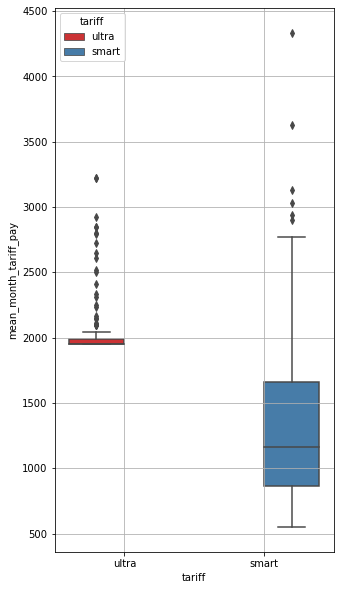

In [147]:
# Построим ящик с усами для оценки средней плата в месяц за тариф
plt.figure(figsize=(5,10))
sns.boxplot(data=df_usr_paid_cmi, x='tariff', y = 'mean_month_tariff_pay', hue='tariff', palette="Set1")
plt.grid()
plt.show();

In [148]:
# Описание данных в колонке средней платы в месяц для тарифа smart
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_tariff_pay'].describe()

count     278.000000
mean     1323.918025
std       613.282598
min       550.000000
25%       867.550000
50%      1164.208333
75%      1658.062500
max      4333.333333
Name: mean_month_tariff_pay, dtype: float64

In [149]:
# Описание данных в колонке средней платы в месяц для тарифа ultra
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_tariff_pay'].describe()

count     112.000000
mean     2072.909806
std       278.830874
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1990.625000
max      3225.000000
Name: mean_month_tariff_pay, dtype: float64

Среднее значение платы за тариф ultra значительно больше, чем у тарифа smart (ultra = 2073руб, smart=1324руб), однако, разброс значений тарифа smart больше, чем у тарифа ultra. Это дает основание пологать, что возможно, тариф smart выгоднее для сотовой компании. Изучим как распределены данные

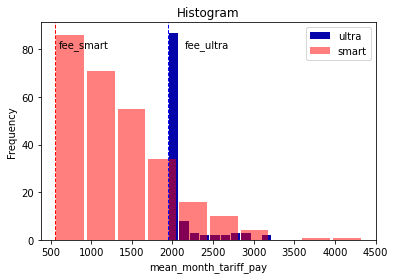

In [150]:
# Построим гистограмму для средней платы в месяц за тариф.
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_tariff_pay'].plot.hist(grid=True, rwidth=0.9, color='#0504aa')
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_tariff_pay'].plot.hist(grid=True, rwidth=0.9, color='red',alpha=0.5)
plt.title('Histogram')
plt.xlabel('mean_month_tariff_pay')
plt.ylabel('Frequency')
plt.legend(labels=('ultra','smart'))
plt.axvline(x=550, color='r', linestyle='dashed', linewidth=1)
plt.text(550*1.1, 90*0.9, 'fee_smart')
plt.axvline(x=1950, color='b', linestyle='dashed', linewidth=1)
plt.text(1950*1.1, 90*0.9, 'fee_ultra')
plt.grid()
plt.show()

In [151]:
mean_ultra_fee = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_tariff_pay'].mean()
mean_smart_fee = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_tariff_pay'].mean()
median_ultra_fee = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_tariff_pay'].median()
median_smart_fee = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_tariff_pay'].median()
var_ultra_fee = np.var(df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_tariff_pay'], ddof=1)
var_smart_fee = np.var(df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_tariff_pay'], ddof=1)

std_ultra_fee = np.sqrt(var_ultra_fee)
std_smart_fee = np.sqrt(var_smart_fee)

print(f'Средняя плата в месяц клиента тарифа ultra: {mean_ultra_fee:.0f} рублей')
print(f'Средняя плата в месяц клиента тарифа smart: {mean_smart_fee:.0f} рублей')
print(f'Медианное значение платы в месяц клиента тарифа ultra: {median_ultra_fee:.0f} рублей')
print(f'Медианное значение платы в месяц клиента тарифа smart: {median_smart_fee:.0f} рублей')
print(f'Дисперсия распределения средней плата в месяц клиента тарифа ultra: {var_ultra_fee:.0f} руб**2')
print(f'Дисперсия распределения средней плата в месяц клиента тарифа smart: {var_smart_fee:.0f} руб**2')
print(f'Стандартное отклонение распределения средней плата в месяц клиента тарифа ultra: {std_ultra_fee:.0f} руб')
print(f'Стандартное отклонение распределения средней плата в месяц клиента тарифа smart: {std_smart_fee:.0f} руб')

Средняя плата в месяц клиента тарифа ultra: 2073 рублей
Средняя плата в месяц клиента тарифа smart: 1324 рублей
Медианное значение платы в месяц клиента тарифа ultra: 1950 рублей
Медианное значение платы в месяц клиента тарифа smart: 1164 рублей
Дисперсия распределения средней плата в месяц клиента тарифа ultra: 77747 руб**2
Дисперсия распределения средней плата в месяц клиента тарифа smart: 376116 руб**2
Стандартное отклонение распределения средней плата в месяц клиента тарифа ultra: 279 руб
Стандартное отклонение распределения средней плата в месяц клиента тарифа smart: 613 руб


Распределение значений ассемитричное для обеих выборок и скошено вправо. Средняя плата в месяц за тариф - величина случайная. И должна подчиняться нормальному закону распределения. 

Построим график квантилей, чтобы проверить, что данные в таблице подчиняются нормальному закону

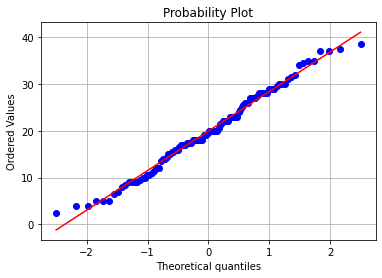

In [152]:
#График квантилей для средней платы за тариф ultra
measurements_u = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_int_traffic']
st.probplot(measurements_u, dist="norm", plot=plt)
plt.grid()
plt.show()

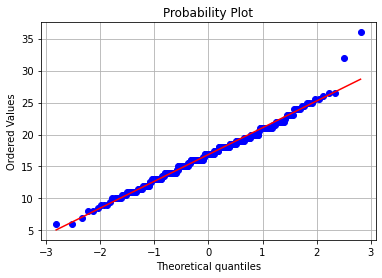

In [153]:
#График квантилей для средней платы за тариф smart
measurements_s = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_int_traffic']
st.probplot(measurements_s, dist="norm", plot=plt)
plt.grid()
plt.show()

Вывод: значения не сильно отклоняются от теоретической линии, следовательно, данные распределены по нормальному закону

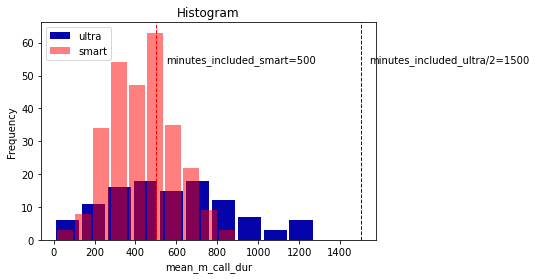

In [154]:
# Построим гистограмму для среднего кол-ва минут разговора в месяц.
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_call_dur'].plot.hist(grid=True, rwidth=0.9, color='#0504aa')
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_call_dur'].plot.hist(grid=True, rwidth=0.9, color='red',alpha=0.5)
plt.title('Histogram')
plt.xlabel('mean_m_call_dur')
plt.ylabel('Frequency')
plt.legend(labels=('ultra','smart'))
plt.axvline(x=500, color='r', linestyle='dashed', linewidth=1)
plt.text(500*1.1, 60*0.9, 'minutes_included_smart=500')
plt.axvline(x=1500, color='b', linestyle='dashed', linewidth=1)
plt.text(1400*1.1, 60*0.9, 'minutes_included_ultra/2=1500')
plt.grid()
plt.show()

In [155]:
mean_ultra_c = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_call_dur'].mean()
mean_smart_c = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_call_dur'].mean()
median_ultra_c = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_call_dur'].median()
median_smart_c = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_call_dur'].median()
var_ultra_c = np.var(df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_call_dur'], ddof=1)
var_smart_c = np.var(df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_call_dur'], ddof=1)

std_ultra_c = np.sqrt(var_ultra_c)
std_smart_c = np.sqrt(var_smart_c)

print(f'Среднее кол-во минут разговора в месяц клиента тарифа ultra: {mean_ultra_c:.0f} мин')
print(f'Среднее кол-во минут разговора в месяц клиента тарифа smart: {mean_smart_c:.0f} мин')
print(f'Медианное значение кол-ва мин. разговора в месяц клиента тарифа ultra: {median_ultra_c:.0f} мин')
print(f'Медианное значение кол-ва мин. разговора в месяц клиента тарифа smart: {median_smart_c:.0f} мин')
print(f'Дисперсия распределения кол-ва мин. разговора в месяц клиента тарифа ultra: {var_ultra_c:.0f} мин**2')
print(f'Дисперсия распределения кол-ва мин. разговора в месяц клиента тарифа smart: {var_smart_c:.0f} мин**2')
print(f'Стандартное отклонение кол-ва мин. разговора в месяц клиента тарифа ultra: {std_ultra_c:.0f} мин')
print(f'Стандартное отклонение кол-ва мин. разговора в месяц клиента тарифа smart: {std_smart_c:.0f} мин')

Среднее кол-во минут разговора в месяц клиента тарифа ultra: 575 мин
Среднее кол-во минут разговора в месяц клиента тарифа smart: 435 мин
Медианное значение кол-ва мин. разговора в месяц клиента тарифа ultra: 535 мин
Медианное значение кол-ва мин. разговора в месяц клиента тарифа smart: 440 мин
Дисперсия распределения кол-ва мин. разговора в месяц клиента тарифа ultra: 87047 мин**2
Дисперсия распределения кол-ва мин. разговора в месяц клиента тарифа smart: 24804 мин**2
Стандартное отклонение кол-ва мин. разговора в месяц клиента тарифа ultra: 295 мин
Стандартное отклонение кол-ва мин. разговора в месяц клиента тарифа smart: 157 мин


Распределение значений нормальное и симметричное (присутствует небольшая скошенность, но она скорее обусловлена малым размером выборки).

Клиенты тарифа smart в среднем тратят кол-во минут разговора чуть меньше порогового значения - 500 мин в месяц.
Клиенты тарифа ultra в среднем тратят 575 мин разговора, что больше порогового значения тарифа smart, и значительно меньше порогового значения тарифа ultra - 3000 мин.

Построим график квантилей, чтобы проверить, что данные в таблице действительно подчиняются нормальному закону

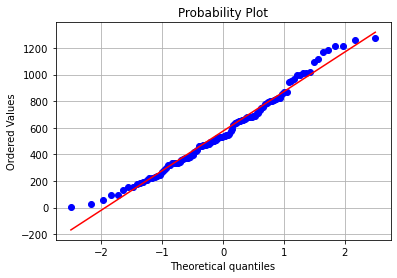

In [156]:
#График квантилей для кол-ва мин. разговора в месяц клиентов тарифа ultra
measurements_u = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_call_dur']
st.probplot(measurements_u, dist="norm", plot=plt)
plt.grid()
plt.show()

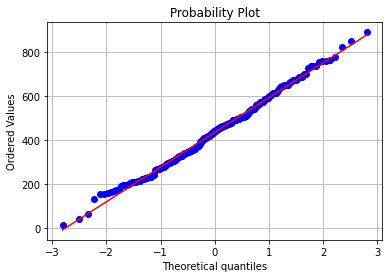

In [157]:
#График квантилей для кол-ва мин. разговора в месяц клиентов тарифа smart
measurements_s = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_call_dur']
st.probplot(measurements_s, dist="norm", plot=plt)
plt.grid()
plt.show()

Вывод: значения не сильно отклоняются от теоретической линии, следовательно, данные распределены по нормальному закону

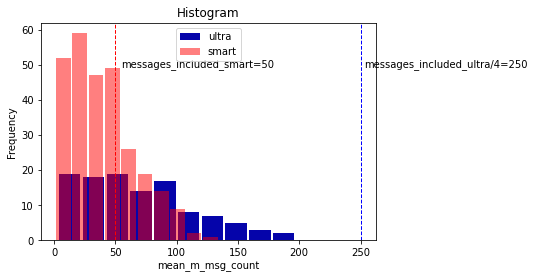

In [158]:
# Построим гистограмму для среднего кол-ва сообщений в месяц.
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_msg_count'].plot.hist(grid=True, rwidth=0.9, color='#0504aa')
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_msg_count'].plot.hist(grid=True, rwidth=0.9, color='red',alpha=0.5)
plt.title('Histogram')
plt.xlabel('mean_m_msg_count')
plt.ylabel('Frequency')
plt.legend(labels=('ultra','smart'))
plt.axvline(x=50, color='r', linestyle='dashed', linewidth=1)
plt.text(50*1.1, 55*0.9, 'messages_included_smart=50')
plt.axvline(x=250, color='b', linestyle='dashed', linewidth=1)
plt.text(230*1.1, 55*0.9, 'messages_included_ultra/4=250')
plt.grid()
plt.show()

In [159]:
mean_ultra_m = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_msg_count'].mean()
mean_smart_m = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_msg_count'].mean()
median_ultra_m = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_msg_count'].median()
median_smart_m = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_msg_count'].median()
var_ultra_m = np.var(df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_msg_count'], ddof=1)
var_smart_m = np.var(df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_msg_count'], ddof=1)

std_ultra_m = np.sqrt(var_ultra_m)
std_smart_m = np.sqrt(var_smart_m)

print(f'Среднее кол-во сообщений в месяц клиента тарифа ultra: {mean_ultra_m:.0f} ')
print(f'Среднее кол-во сообщений в месяц клиента тарифа smart: {mean_smart_m:.0f} ')
print(f'Медианное значение кол-ва сообщений в месяц клиента тарифа ultra: {median_ultra_m:.0f} ')
print(f'Медианное значение кол-ва сообщений в месяц клиента тарифа smart: {median_smart_m:.0f} ')
print(f'Дисперсия распределения кол-ва сообщений в месяц клиента тарифа ultra: {var_ultra_m:.0f} ')
print(f'Дисперсия распределения кол-ва сообщений в месяц клиента тарифа smart: {var_smart_m:.0f} ')
print(f'Стандартное отклонение кол-ва сообщений в месяц клиента тарифа ultra: {std_ultra_m:.0f} ')
print(f'Стандартное отклонение кол-ва сообщений в месяц клиента тарифа smart: {std_smart_m:.0f} ')

Среднее кол-во сообщений в месяц клиента тарифа ultra: 68 
Среднее кол-во сообщений в месяц клиента тарифа smart: 39 
Медианное значение кол-ва сообщений в месяц клиента тарифа ultra: 62 
Медианное значение кол-ва сообщений в месяц клиента тарифа smart: 35 
Дисперсия распределения кол-ва сообщений в месяц клиента тарифа ultra: 2041 
Дисперсия распределения кол-ва сообщений в месяц клиента тарифа smart: 705 
Стандартное отклонение кол-ва сообщений в месяц клиента тарифа ultra: 45 
Стандартное отклонение кол-ва сообщений в месяц клиента тарифа smart: 27 


Распределение значений асимметричное, скошено вправо.

Клиенты тарифа smart в среднем отправляют сообщений чуть больше порогового значения - 50 сообщений в месяц.
Клиенты тарифа ultra в среднем отправляют практически в 2 раза больше сообщений, чем клинеты тарифа smart, однако это значение значительно ниже порогового значения тарифа ultra - 1000 сообщений в месяц.

Построим график квантилей, чтобы проверить, что данные в таблице подчиняются нормальному закону

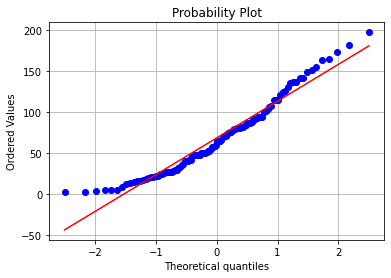

In [160]:
#График квантилей для кол-ва сообщений в  месяц клиентов тарифа ultra
measurements_u = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_m_msg_count']
st.probplot(measurements_u, dist="norm", plot=plt)
plt.grid()
plt.show()

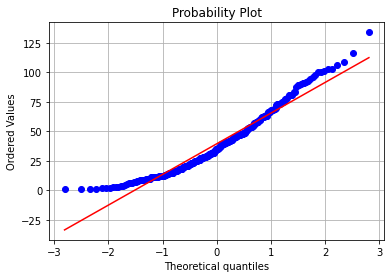

In [161]:
#График квантилей для кол-ва сообщений в  месяц клиентов тарифа smart
measurements_s = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_m_msg_count']
st.probplot(measurements_s, dist="norm", plot=plt)
plt.grid()
plt.show()

Вывод: наблюдается отклонение данных от линии в нижнем углу графика. Однако, кол-во сообщений в месяц, так же является случайной величиной. Отклонение от линии скорее всего обусловлено малой выборкой

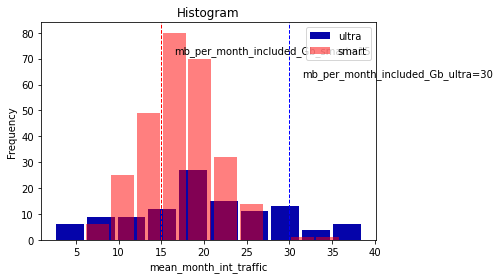

In [162]:
# Построим гистограмму для среднего кол-ва интернет-трафика в месяц.
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_int_traffic'].plot.hist(grid=True, rwidth=0.9, color='#0504aa')
df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_int_traffic'].plot.hist(grid=True, rwidth=0.9, color='red',alpha=0.5)
plt.title('Histogram')
plt.xlabel('mean_month_int_traffic')
plt.ylabel('Frequency')
plt.legend(labels=('ultra','smart'))
plt.axvline(x=15, color='r', linestyle='dashed', linewidth=1)
plt.text(15*1.1, 80*0.9, 'mb_per_month_included_Gb_smart=15')
plt.axvline(x=30, color='b', linestyle='dashed', linewidth=1)
plt.text(30*1.05, 70*0.9, 'mb_per_month_included_Gb_ultra=30')
plt.grid()
plt.show()

In [163]:
mean_ultra_i = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_int_traffic'].mean()
mean_smart_i = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_int_traffic'].mean()
median_ultra_i = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_int_traffic'].median()
median_smart_i = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_int_traffic'].median()
var_ultra_i = np.var(df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_int_traffic'], ddof=1)
var_smart_i = np.var(df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_int_traffic'], ddof=1)

std_ultra_i = np.sqrt(var_ultra_i)
std_smart_i = np.sqrt(var_smart_i)

print(f'Среднее кол-во сообщений в месяц клиента тарифа ultra: {mean_ultra_i:.0f} ')
print(f'Среднее кол-во сообщений в месяц клиента тарифа smart: {mean_smart_i:.0f} ')
print(f'Медианное значение кол-ва сообщений в месяц клиента тарифа ultra: {median_ultra_i:.0f} ')
print(f'Медианное значение кол-ва сообщений в месяц клиента тарифа smart: {median_smart_i:.0f} ')
print(f'Дисперсия распределения кол-ва сообщений в месяц клиента тарифа ultra: {var_ultra_i:.0f} ')
print(f'Дисперсия распределения кол-ва сообщений в месяц клиента тарифа smart: {var_smart_i:.0f} ')
print(f'Стандартное отклонение кол-ва сообщений в месяц клиента тарифа ultra: {std_ultra_i:.0f} ')
print(f'Стандартное отклонение кол-ва сообщений в месяц клиента тарифа smart: {std_smart_i:.0f} ')

Среднее кол-во сообщений в месяц клиента тарифа ultra: 20 
Среднее кол-во сообщений в месяц клиента тарифа smart: 17 
Медианное значение кол-ва сообщений в месяц клиента тарифа ultra: 20 
Медианное значение кол-ва сообщений в месяц клиента тарифа smart: 17 
Дисперсия распределения кол-ва сообщений в месяц клиента тарифа ultra: 70 
Дисперсия распределения кол-ва сообщений в месяц клиента тарифа smart: 18 
Стандартное отклонение кол-ва сообщений в месяц клиента тарифа ultra: 8 
Стандартное отклонение кол-ва сообщений в месяц клиента тарифа smart: 4 


Распределение значений симметричное.

Клиенты тарифа smart в среднем тратят на 3Гб в месяц больше, чем пороговое значение - 15Гб.
Клиенты тарифа ultra в среднем тратят на 10Гб меньше, чем пороговое значение тарифа - 30Гб.

Построим график квантилей, чтобы проверить, что данные в таблице подчиняются нормальному закону

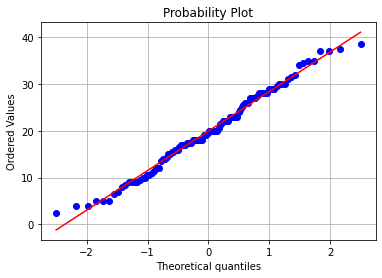

In [164]:
#График квантилей для кол-ва интернет-трафика в  месяц клиентов тарифа ultra
measurements_u = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_int_traffic']
st.probplot(measurements_u, dist="norm", plot=plt)
plt.grid()
plt.show()

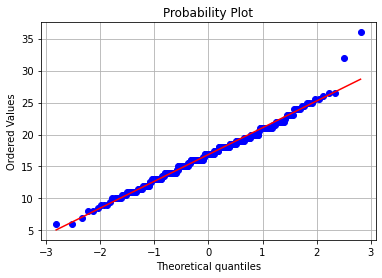

In [165]:
#График квантилей для кол-ва интернет-трафика в  месяц клиентов тарифа smart
measurements_s = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_int_traffic']
st.probplot(measurements_s, dist="norm", plot=plt)
plt.grid()
plt.show()

Вывод: значения не сильно отклоняются от теоретической линии, следовательно, данные распределены по нормальному закону

## Проверка гипотиз

### Гипотиза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Мы имеем две независимые выборки. Необходимо оценить отличается ли средняя выручка между двумя выборками.
Примем, что средняя выручка не отличается - нулевая гипотиза. Альтернативная гипотиза - средняя выручка отличается. Если мы сможем опровергнуть нулевую гипотизу, то выручка отличается.
Посчитаем T-критерий для средних значений двух независимых выборок.

In [166]:
alpha = 0.05
fee_ultra = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='ultra']['mean_month_tariff_pay']
fee_smart = df_usr_paid_cmi[df_usr_paid_cmi['tariff']=='smart']['mean_month_tariff_pay']
results = st.ttest_ind(
    fee_ultra, 
    fee_smart)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.124182279241818e-30
Отвергаем нулевую гипотезу


Вывод: нулевая гипотиза (средняя выручка не отличается) не подтвердилась. Следовательно - средняя выручка у двух тарифов разная.

### Гипотиза 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сделаем оценку для каждого тарифа. Будем считать, что выборки независимые.
Нулевая гипотиза - выручка пользователей из Москвы не отличается от выручки из других регионов. Альтернативная гипотиза - выручка пользователей из Москвы отличается от выручки из других регионов. Если мы сможем опровергнуть нулевую гипотизу, то выручка отличается.

Разделим данные для пользователей из Москвы и из других регионов для каждого тарифа.

In [167]:
# Данные пользователей из Москвы для тарифа ultra
fee_ultra_msk = df_usr_paid_cmi[(df_usr_paid_cmi['tariff']=='ultra')&(
df_usr_paid_cmi['city']=='Москва')]['mean_month_tariff_pay']

In [168]:
# Данные пользователей не из Москвы для тарифа ultra
fee_ultra_Nmsk = df_usr_paid_cmi[(df_usr_paid_cmi['tariff']=='ultra')&(
df_usr_paid_cmi['city']!='Москва')]['mean_month_tariff_pay']

In [169]:
# Данные пользователей из Москвы для тарифа smart
fee_smart_msk = df_usr_paid_cmi[(df_usr_paid_cmi['tariff']=='smart')&(
df_usr_paid_cmi['city']=='Москва')]['mean_month_tariff_pay']
# Данные пользователей не из Москвы для тарифа smart
fee_smart_Nmsk = df_usr_paid_cmi[(df_usr_paid_cmi['tariff']=='smart')&(
df_usr_paid_cmi['city']!='Москва')]['mean_month_tariff_pay']

In [170]:
alpha = 0.05

results = st.ttest_ind(
    fee_ultra_msk, 
    fee_ultra_Nmsk)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9637479280552168
Не получилось отвергнуть нулевую гипотезу


In [171]:
alpha = 0.05

results = st.ttest_ind(
    fee_smart_msk, 
    fee_smart_Nmsk)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2832739497053645
Не получилось отвергнуть нулевую гипотезу


Вывод: средняя выручка для пользователей из Москвы и из регионов - не отличается для двух тарифов.

### Вывод: 
Средняя выручка двух тарифов отличается. Тариф Smart более выгоден для сотового оператора.

Средняя выручка в Москве и других регионах не отличается, следовательно, рекламную акцию необходимо проводить не только в Москве, но и в других городах России.